✅ File loaded successfully!

--- First 5 Rows ---
           DateTime weather main weather description  Temperature (C)  \
0  25/04/2024 00:00       Clouds    scattered clouds            23.96   
1  25/04/2024 01:00       Clouds    scattered clouds            23.96   
2  25/04/2024 02:00         Rain       moderate rain            24.96   
3  25/04/2024 03:00         Rain          light rain            24.96   
4  25/04/2024 04:00       Clouds          few clouds            23.96   

   feels like  Pressure (hPa)  sea level pressure  grnd level pressure  \
0       24.60            1005                 NaN                  NaN   
1       24.78            1005                 NaN                  NaN   
2       24.96            1004                 NaN                  NaN   
3       24.96            1004                 NaN                  NaN   
4       24.81            1004                 NaN                  NaN   

   Humidity %  wind speed (m/s)  wind deg  wind gust  cloudiness (

C:\Users\minht\AppData\Local\Temp\ipykernel_8752\1329861589.py:21: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['DateTime'])
C:\Users\minht\AppData\Local\Temp\ipykernel_8752\1329861589.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rain volumn (mm)'].fillna(0, inplace=True)


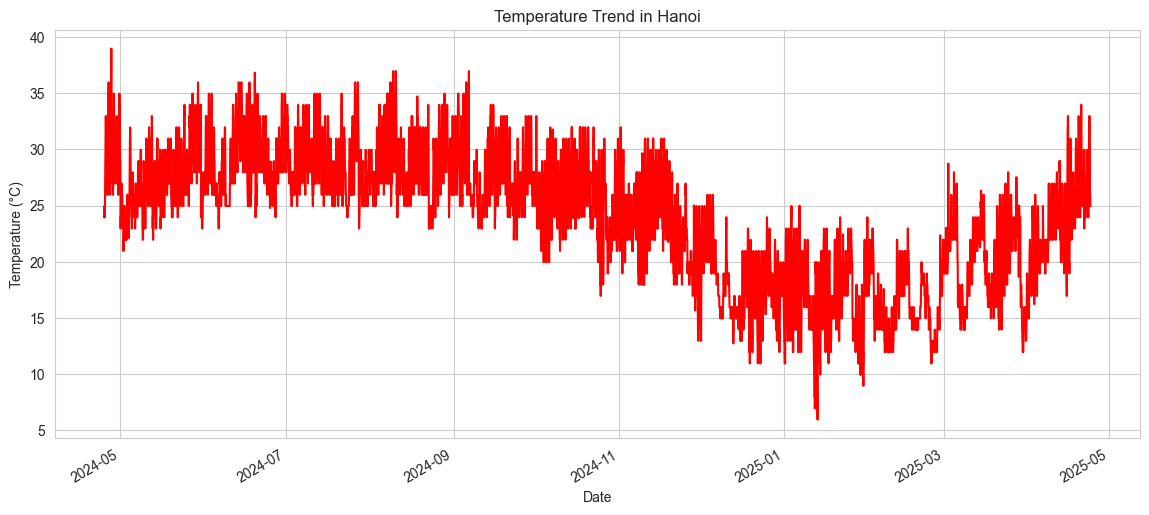

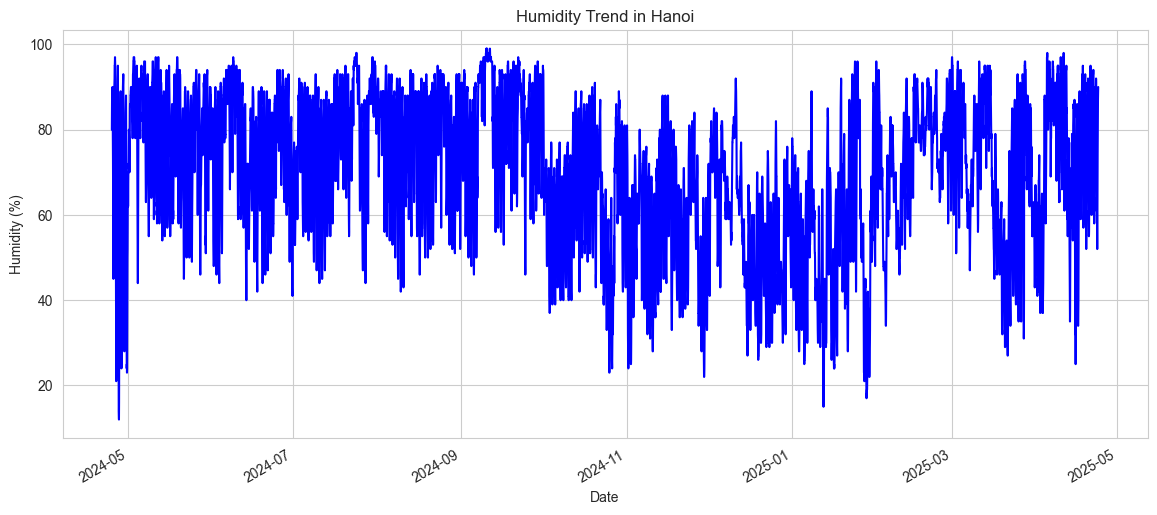

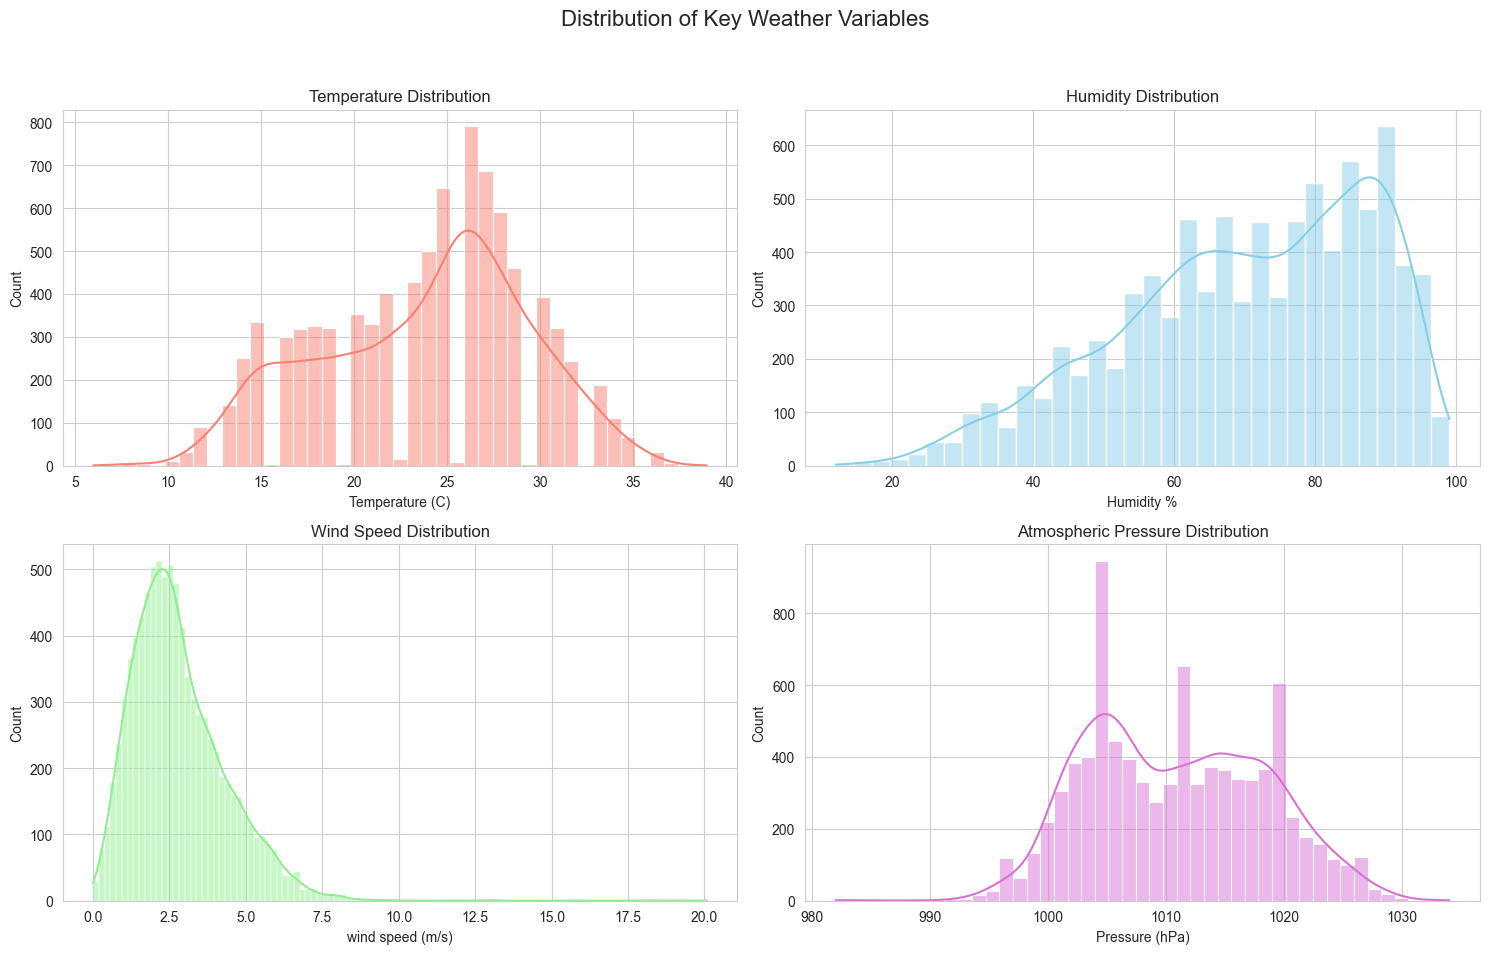

C:\Users\minht\AppData\Local\Temp\ipykernel_8752\1329861589.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['weather main'], order=df_cleaned['weather main'].value_counts().index, palette='viridis')


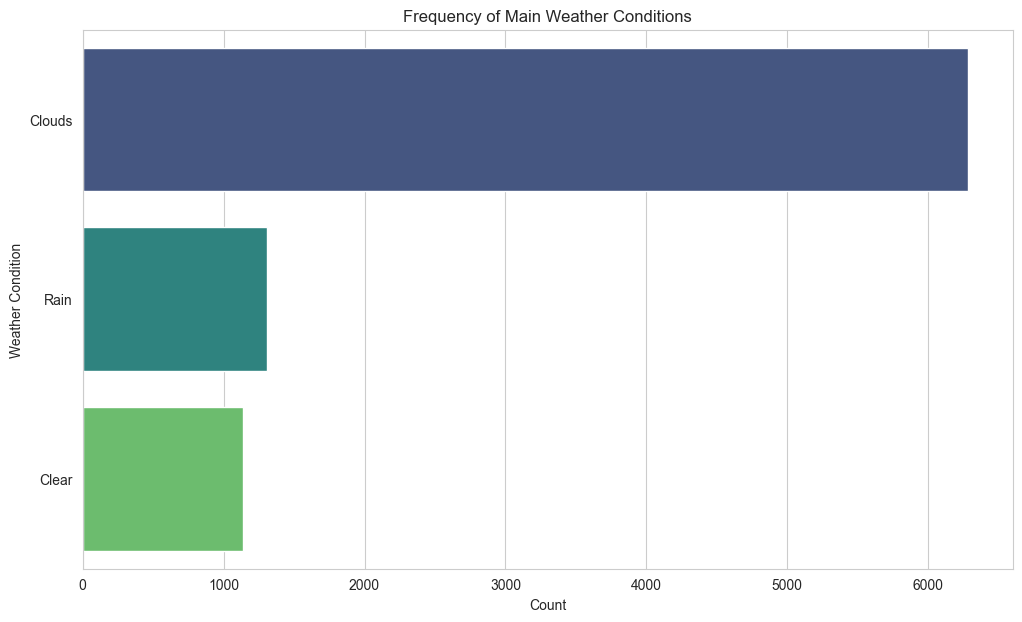

C:\Users\minht\AppData\Local\Temp\ipykernel_8752\1329861589.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['weather description'], order=top_15_descriptions, palette='plasma')


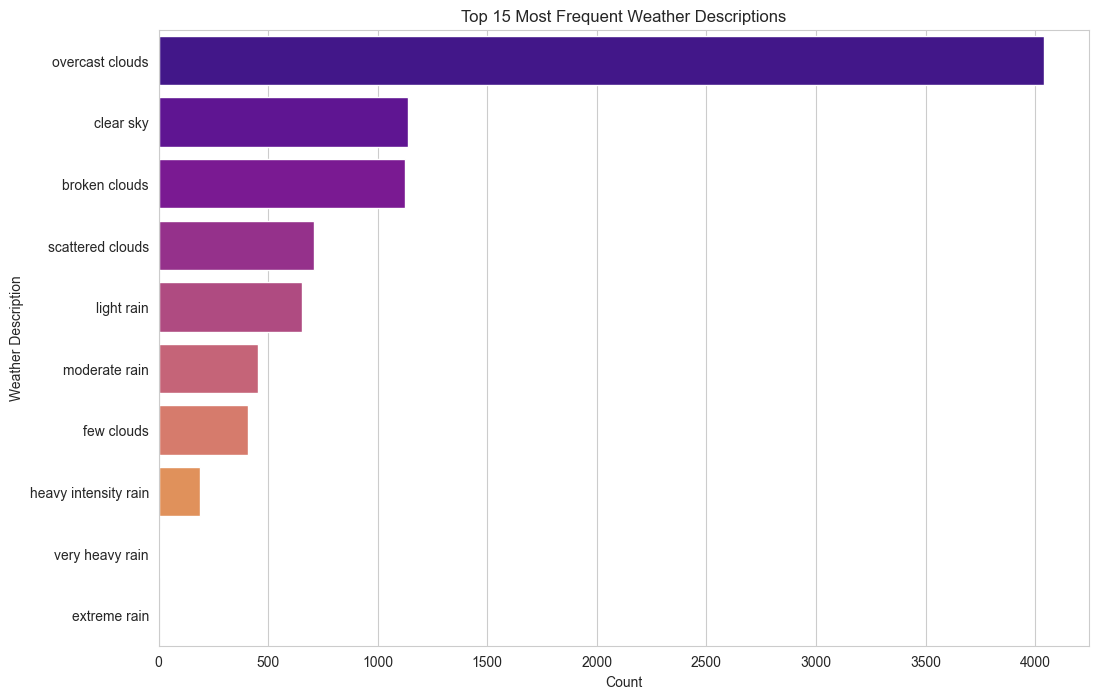

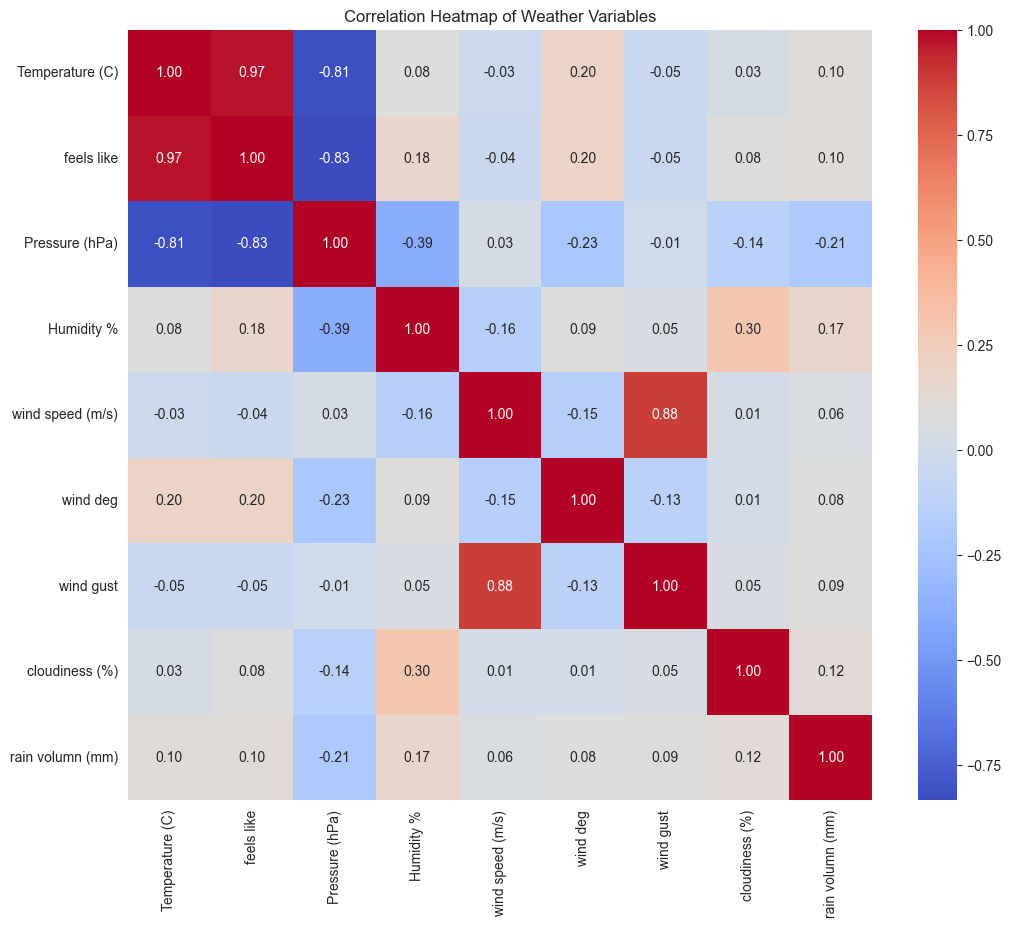


✅ EDA script finished successfully!


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Inspect the Data ---
try:
    # Load the dataset from the CSV file
    df = pd.read_csv('Hanoi_Weather_Data.csv')
    print("✅ File loaded successfully!")

    print("\n--- First 5 Rows ---")
    print(df.head())

    print("\n--- Data Types and Info ---")
    df.info()

    # --- 2. Data Cleaning ---
    print("\n--- Cleaning Data ---")

    # Convert 'DateTime' column to a proper datetime format
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    print("✅ 'DateTime' column converted.")

    # Fill missing 'rain volumn (mm)' values with 0
    df['rain volumn (mm)'].fillna(0, inplace=True)
    print("✅ Missing rain volume values filled with 0.")

    # Drop columns that are unnecessary or mostly empty
    cols_to_drop = ['sea level pressure', 'grnd level pressure', 'snow volumn (mm)', 'icon id']
    df_cleaned = df.drop(columns=cols_to_drop)
    print(f"\n✅ Dropped columns: {', '.join(cols_to_drop)}")

    # Set the DateTime as the index for easier time-series plotting
    df_cleaned.set_index('DateTime', inplace=True)


    # --- 3. Descriptive Statistics ---
    print("\n--- Descriptive Statistics for Numerical Data ---")
    print(df_cleaned.describe())


    # --- 4. Data Visualization ---
    print("\n--- Generating Visualizations ---")
    sns.set_style("whitegrid")
    
    # --- UPDATED: Plot 1: Temperature Over Time (Separate Figure) ---
    plt.figure(figsize=(14, 6))
    df_cleaned['Temperature (C)'].plot(title='Temperature Trend in Hanoi', color='red')
    plt.ylabel('Temperature (°C)')
    plt.xlabel('Date')
    plt.show()

    # --- UPDATED: Plot 2: Humidity Over Time (Separate Figure) ---
    plt.figure(figsize=(14, 6))
    df_cleaned['Humidity %'].plot(title='Humidity Trend in Hanoi', color='blue')
    plt.ylabel('Humidity (%)')
    plt.xlabel('Date')
    plt.show()


    # Plot 3: Distribution of Key Weather Variables
    plt.figure(figsize=(15, 10))
    plt.suptitle("Distribution of Key Weather Variables", fontsize=16)
    
    plt.subplot(2, 2, 1)
    sns.histplot(df_cleaned['Temperature (C)'], kde=True, color='salmon')
    plt.title('Temperature Distribution')

    plt.subplot(2, 2, 2)
    sns.histplot(df_cleaned['Humidity %'], kde=True, color='skyblue')
    plt.title('Humidity Distribution')

    plt.subplot(2, 2, 3)
    sns.histplot(df_cleaned['wind speed (m/s)'], kde=True, color='lightgreen')
    plt.title('Wind Speed Distribution')

    plt.subplot(2, 2, 4)
    sns.histplot(df_cleaned['Pressure (hPa)'], kde=True, color='orchid')
    plt.title('Atmospheric Pressure Distribution')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


    # Plot 4: Frequency of Main Weather Conditions
    plt.figure(figsize=(12, 7))
    sns.countplot(y=df_cleaned['weather main'], order=df_cleaned['weather main'].value_counts().index, palette='viridis')
    plt.title('Frequency of Main Weather Conditions')
    plt.xlabel('Count')
    plt.ylabel('Weather Condition')
    plt.show()
    
    # Plot 5: Frequency of Weather Descriptions
    plt.figure(figsize=(12, 8))
    top_15_descriptions = df_cleaned['weather description'].value_counts().nlargest(15).index
    sns.countplot(y=df_cleaned['weather description'], order=top_15_descriptions, palette='plasma')
    plt.title('Top 15 Most Frequent Weather Descriptions')
    plt.xlabel('Count')
    plt.ylabel('Weather Description')
    plt.show()

    # Plot 6: Correlation Heatmap
    plt.figure(figsize=(12, 10))
    numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_cols.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Weather Variables')
    plt.show()

    print("\n✅ EDA script finished successfully!")

except FileNotFoundError:
    print("❌ Error: 'Hanoi_Weather_Data.csv' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

✅ File loaded successfully!

--- First 5 Rows ---
           DateTime weather main weather description  Temperature (C)  \
0  25/04/2024 00:00       Clouds    scattered clouds            23.96   
1  25/04/2024 01:00       Clouds    scattered clouds            23.96   
2  25/04/2024 02:00         Rain       moderate rain            24.96   
3  25/04/2024 03:00         Rain          light rain            24.96   
4  25/04/2024 04:00       Clouds          few clouds            23.96   

   feels like  Pressure (hPa)  sea level pressure  grnd level pressure  \
0       24.60            1005                 NaN                  NaN   
1       24.78            1005                 NaN                  NaN   
2       24.96            1004                 NaN                  NaN   
3       24.96            1004                 NaN                  NaN   
4       24.81            1004                 NaN                  NaN   

   Humidity %  wind speed (m/s)  wind deg  wind gust  cloudiness (

C:\Users\minht\AppData\Local\Temp\ipykernel_8752\2178366341.py:21: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['DateTime'])
C:\Users\minht\AppData\Local\Temp\ipykernel_8752\2178366341.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rain volumn (mm)'].fillna(0, inplace=True)


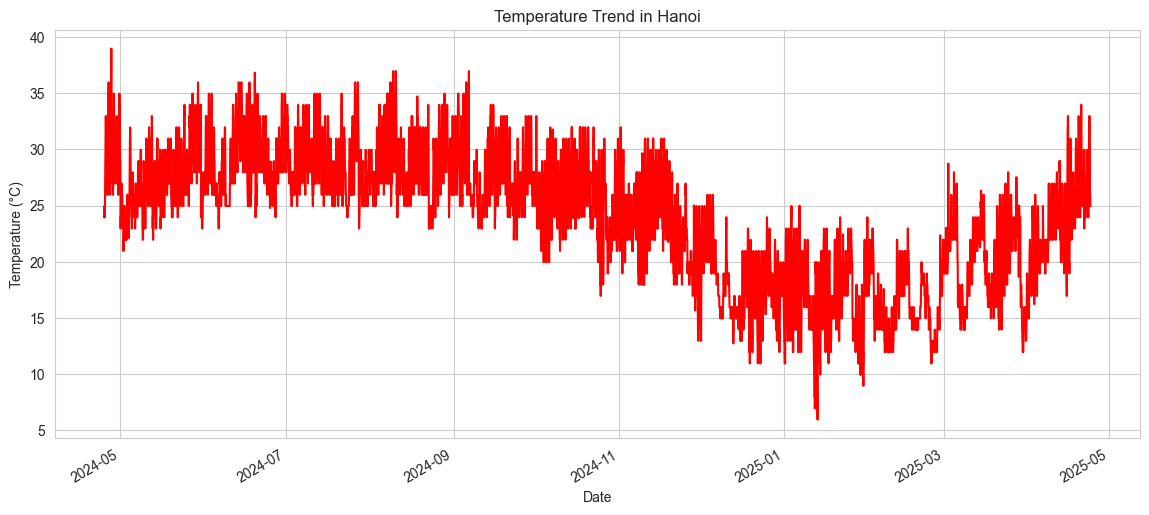

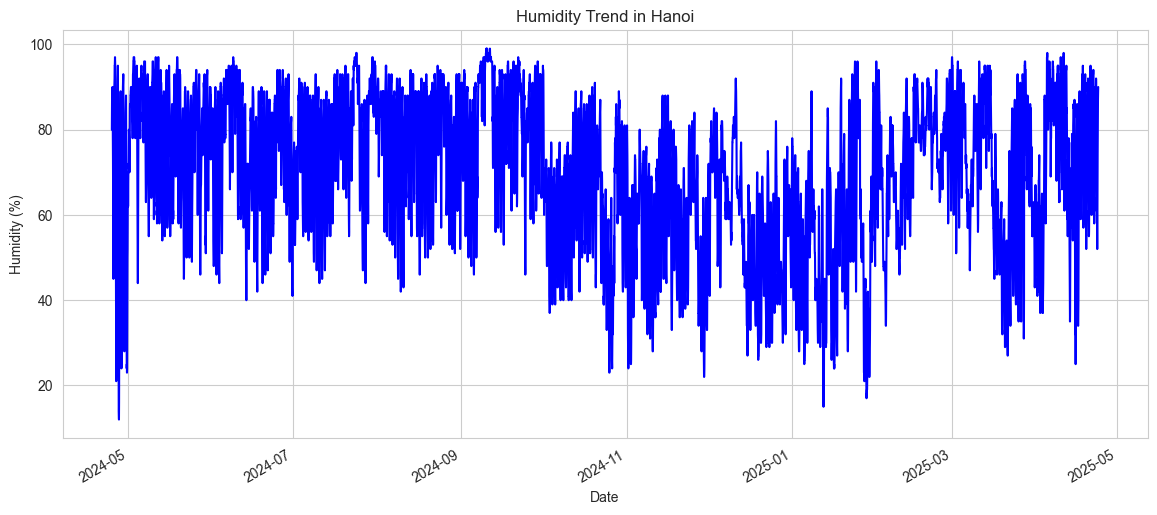

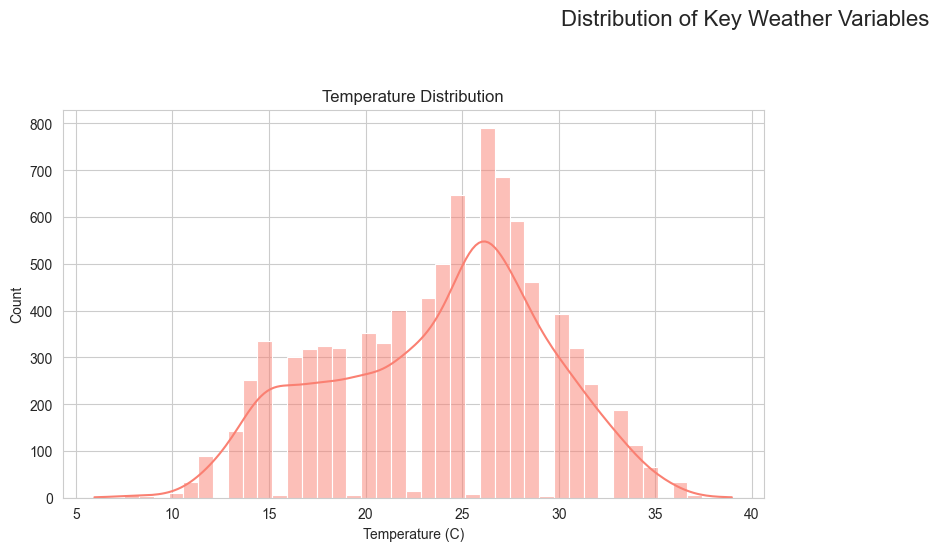

C:\Users\minht\AppData\Local\Temp\ipykernel_8752\2178366341.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['weather main'], order=df_cleaned['weather main'].value_counts().index, palette='viridis')


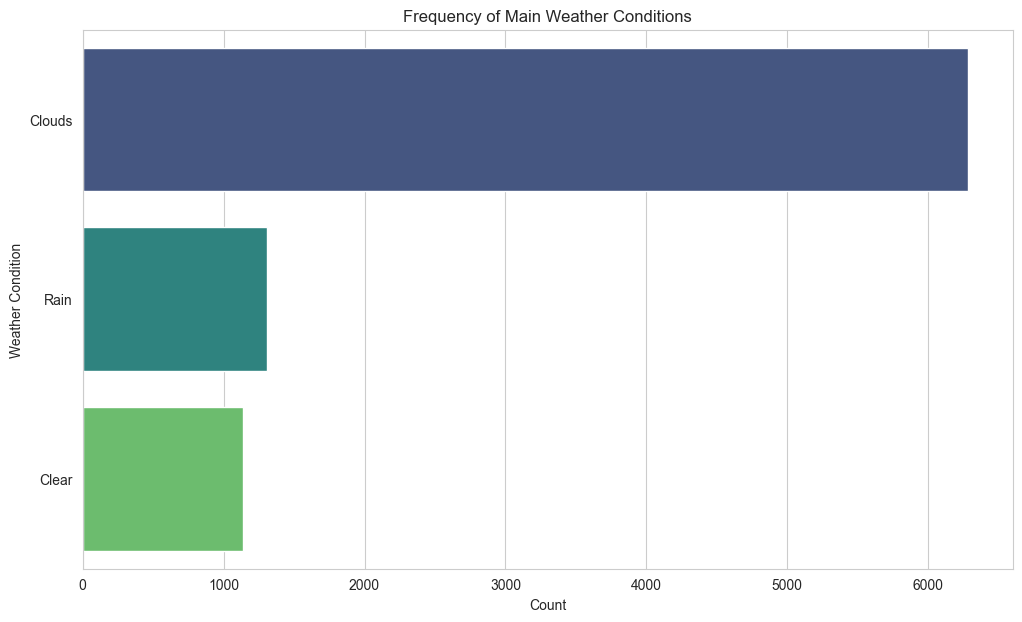

C:\Users\minht\AppData\Local\Temp\ipykernel_8752\2178366341.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['weather description'], order=top_15_descriptions, palette='plasma')


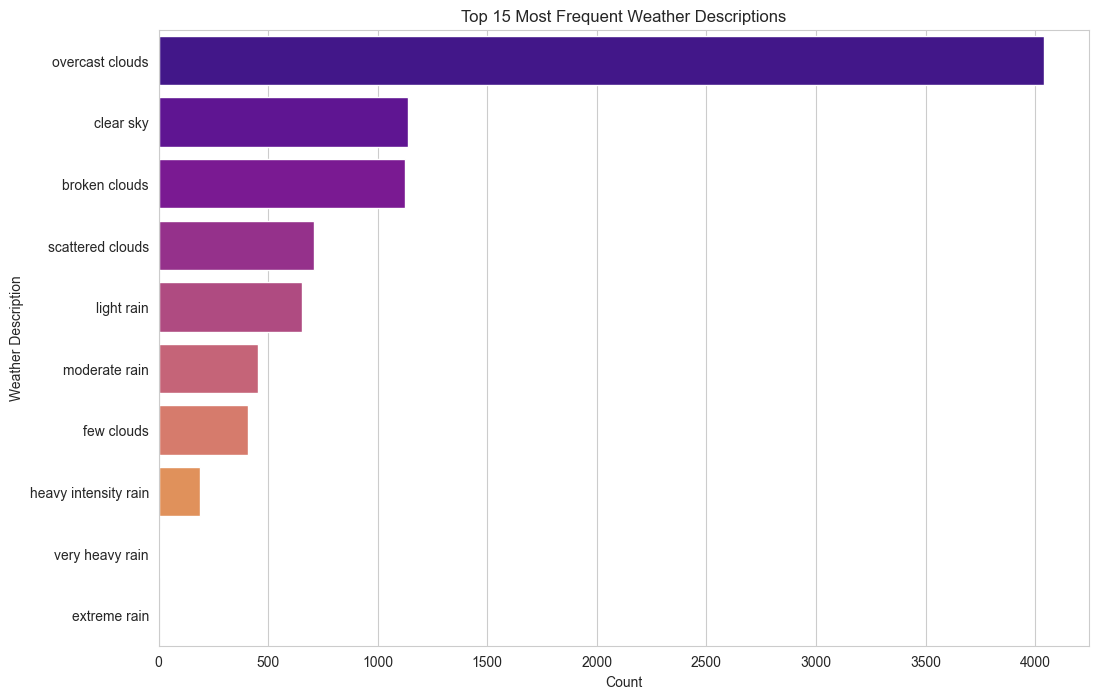

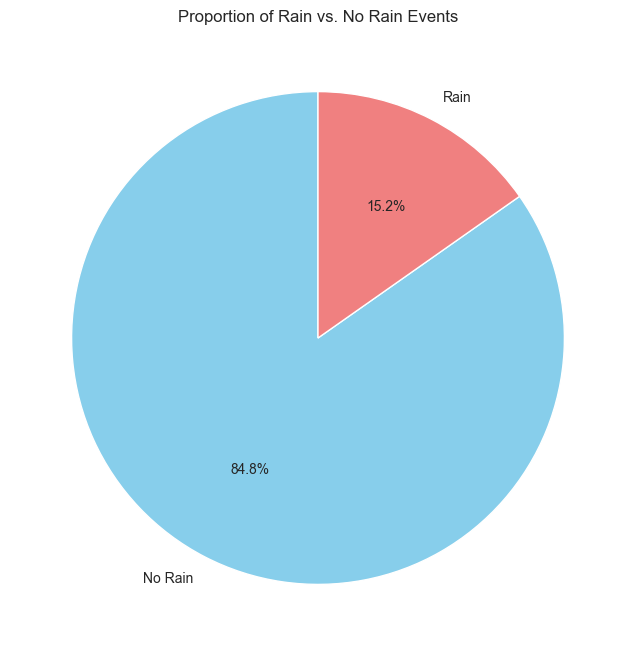

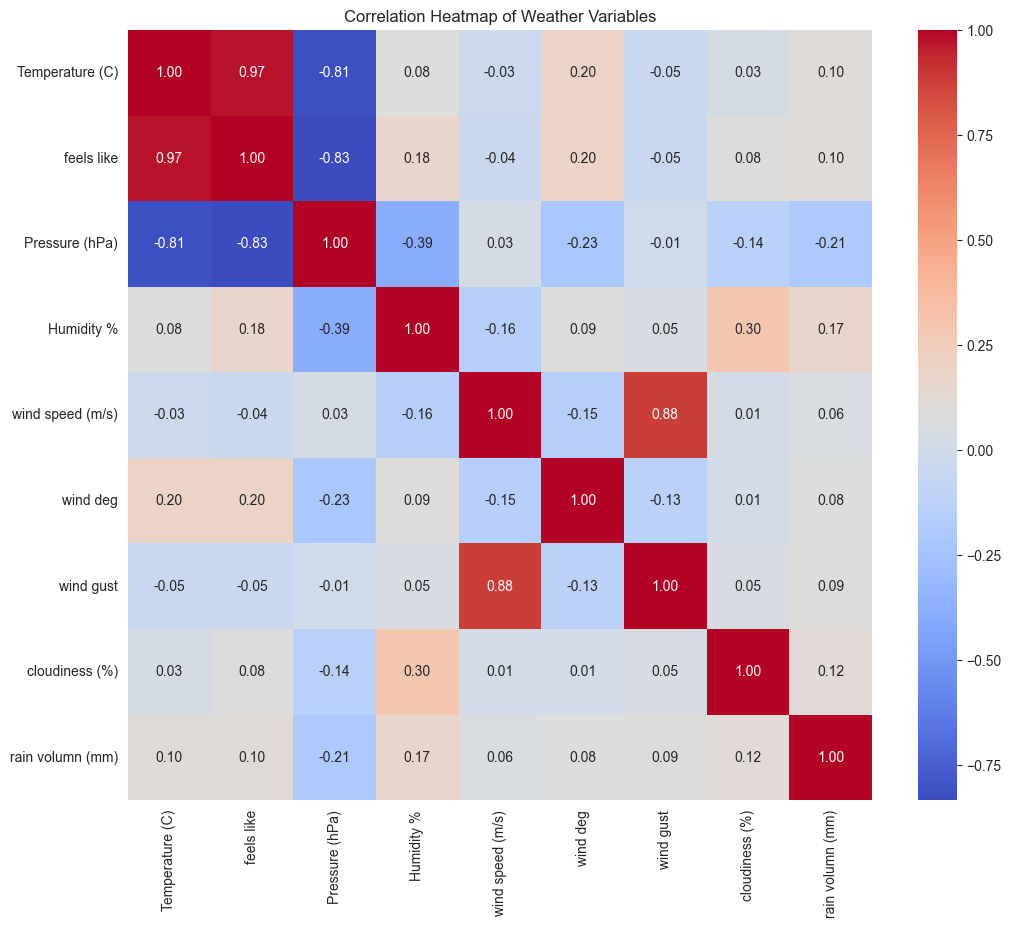


✅ EDA script finished successfully!


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Inspect the Data ---
try:
    # Load the dataset from the CSV file
    df = pd.read_csv('Hanoi_Weather_Data.csv')
    print("✅ File loaded successfully!")

    print("\n--- First 5 Rows ---")
    print(df.head())

    print("\n--- Data Types and Info ---")
    df.info()

    # --- 2. Data Cleaning & Feature Engineering ---
    print("\n--- Cleaning Data ---")

    # Convert 'DateTime' column to a proper datetime format
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    print("✅ 'DateTime' column converted.")

    # Fill missing 'rain volumn (mm)' values with 0
    df['rain volumn (mm)'].fillna(0, inplace=True)
    print("✅ Missing rain volume values filled with 0.")
    
    # --- NEW: Create a binary 'Rain Event' column ---
    # If rain volume is > 0, it's a 'Rain' event, otherwise 'No Rain'.
    df['Rain Event'] = df['rain volumn (mm)'].apply(lambda x: 'Rain' if x > 0 else 'No Rain')
    print("✅ 'Rain Event' column created.")

    # Drop columns that are unnecessary or mostly empty
    cols_to_drop = ['sea level pressure', 'grnd level pressure', 'snow volumn (mm)', 'icon id']
    df_cleaned = df.drop(columns=cols_to_drop)
    print(f"\n✅ Dropped columns: {', '.join(cols_to_drop)}")

    # Set the DateTime as the index for easier time-series plotting
    df_cleaned.set_index('DateTime', inplace=True)


    # --- 3. Descriptive Statistics ---
    print("\n--- Descriptive Statistics for Numerical Data ---")
    print(df_cleaned.describe())


    # --- 4. Data Visualization ---
    print("\n--- Generating Visualizations ---")
    sns.set_style("whitegrid")
    
    # Plot 1: Temperature Over Time
    plt.figure(figsize=(14, 6))
    df_cleaned['Temperature (C)'].plot(title='Temperature Trend in Hanoi', color='red')
    plt.ylabel('Temperature (°C)')
    plt.xlabel('Date')
    plt.show()

    # Plot 2: Humidity Over Time
    plt.figure(figsize=(14, 6))
    df_cleaned['Humidity %'].plot(title='Humidity Trend in Hanoi', color='blue')
    plt.ylabel('Humidity (%)')
    plt.xlabel('Date')
    plt.show()

    # Plot 3: Distribution of Key Weather Variables
    plt.figure(figsize=(15, 10))
    plt.suptitle("Distribution of Key Weather Variables", fontsize=16)
    
    plt.subplot(2, 2, 1)
    sns.histplot(df_cleaned['Temperature (C)'], kde=True, color='salmon')
    plt.title('Temperature Distribution')
    # ... (rest of the subplots)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Plot 4: Frequency of Main Weather Conditions
    plt.figure(figsize=(12, 7))
    sns.countplot(y=df_cleaned['weather main'], order=df_cleaned['weather main'].value_counts().index, palette='viridis')
    plt.title('Frequency of Main Weather Conditions')
    plt.xlabel('Count')
    plt.ylabel('Weather Condition')
    plt.show()
    
    # Plot 5: Frequency of Weather Descriptions
    plt.figure(figsize=(12, 8))
    top_15_descriptions = df_cleaned['weather description'].value_counts().nlargest(15).index
    sns.countplot(y=df_cleaned['weather description'], order=top_15_descriptions, palette='plasma')
    plt.title('Top 15 Most Frequent Weather Descriptions')
    plt.xlabel('Count')
    plt.ylabel('Weather Description')
    plt.show()

    # --- NEW: Plot 6: Pie Chart for Rain vs. No Rain ---
    plt.figure(figsize=(8, 8))
    rain_counts = df_cleaned['Rain Event'].value_counts()
    plt.pie(rain_counts, labels=rain_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
    plt.title('Proportion of Rain vs. No Rain Events')
    plt.ylabel('') # Hides the 'Rain Event' label on the y-axis for a cleaner look
    plt.show()

    # Plot 7: Correlation Heatmap
    plt.figure(figsize=(12, 10))
    numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_cols.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Weather Variables')
    plt.show()

    print("\n✅ EDA script finished successfully!")

except FileNotFoundError:
    print("❌ Error: 'Hanoi_Weather_Data.csv' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
import pandas as pd
import io

# --- 1. Data Loading and Cleaning ---

# The content from the file you uploaded.
# csv_content = """DateTime,weather main,weather description,Temperature (C),feels like,Pressure (hPa),sea level pressure,grnd level pressure,Humidity %,wind speed (m/s),wind deg,wind gust,cloudiness (%),rain volumn (mm),snow volumn (mm),icon id
# 25/04/2024 00:00,Clouds,scattered clouds,23.96,24.6,1005,,,80,1.85,163,3.67,26,,,03n
# 25/04/2024 01:00,Clouds,scattered clouds,23.96,24.78,1005,,,87,0.54,248,2.3,45,,,03n
# 25/04/2024 02:00,Rain,moderate rain,24.96,24.96,1004,,,88,0.97,91,1.36,7,3.55,,10n
# 25/04/2024 03:00,Rain,light rain,24.96,24.96,1004,,,88,0.99,102,1.43,10,0.56,,10n
# """ # Note: This is just a small sample of your data for demonstration.

# Read the CSV content into a pandas DataFrame
# In your own code, you would use: df = pd.read_csv('Hanoi_Weather_Data.csv')
df = pd.read_csv('Hanoi_Weather_Data.csv')


# --- 2. Data Cleaning and Preprocessing ---
print("--- Starting Data Cleaning ---")

# Standardize column names (e.g., "Temperature (C)" becomes "temperature_c")
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.lower()
print("1. Standardized column names.")

# Convert 'datetime' column to datetime objects and set as the DataFrame index
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M')
df.set_index('datetime', inplace=True)
print("2. Converted 'datetime' to be the index.")

# Drop columns that are completely empty or not useful for modeling
# Based on the data preview, 'sea_level_pressure', 'grnd_level_pressure', and 'snow_volumn_mm' are empty.
# We also drop text-based columns that models like LSTM/XGBoost can't use directly.
df.drop(columns=['sea_level_pressure', 'grnd_level_pressure', 'snow_volumn_mm', 'icon_id'], inplace=True, errors='ignore')
print("3. Dropped unnecessary or empty columns.")

# Handle Missing Values
# Assume that if rain volume is missing (NaN), it means there was no rain (0).
df['rain_volumn_mm'] = df['rain_volumn_mm'].fillna(0)
# A common strategy for sensor data like wind is to fill missing values with the last known value.
# df['wind_gust'] = df['wind_gust'].fillna(method='ffill')
print("4. Handled missing values in rain and wind gust columns.")

# Create a binary target column for rain probability forecasting
# If it rained at all (volume > 0), we mark it as a 1, otherwise 0.
df['rain_event'] = (df['rain_volumn_mm'] > 0).astype(int)
print("5. Created 'rain_event' column for classification.")


# --- 3. Display Cleaned Data ---
print("\n--- Data Cleaning Complete ---")
print("\nCleaned Data Information:")
df.info()

print("\nFirst 5 rows of the cleaned data:")
df.head()

--- Starting Data Cleaning ---
1. Standardized column names.
2. Converted 'datetime' to be the index.
3. Dropped unnecessary or empty columns.
4. Handled missing values in rain and wind gust columns.
5. Created 'rain_event' column for classification.

--- Data Cleaning Complete ---

Cleaned Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8728 entries, 2024-04-25 00:00:00 to 2025-04-24 00:00:00
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   weather_main         8728 non-null   object 
 1   weather_description  8728 non-null   object 
 2   temperature_c        8728 non-null   float64
 3   feels_like           8728 non-null   float64
 4   pressure_hpa         8728 non-null   int64  
 5   humidity_%           8728 non-null   int64  
 6   wind_speed_m/s       8728 non-null   float64
 7   wind_deg             8728 non-null   int64  
 8   wind_gust            8728 non-null   float

,weather_main,weather_description,temperature_c,feels_like,pressure_hpa,humidity_%,wind_speed_m/s,wind_deg,wind_gust,cloudiness_%,rain_volumn_mm,rain_event
datetime,,,,,,,,,,,,
2024-04-25 00:00:00,Clouds,scattered clouds,23.96,24.60,1005,80,1.85,163,3.67,26,0.00,0
2024-04-25 01:00:00,Clouds,scattered clouds,23.96,24.78,1005,87,0.54,248,2.30,45,0.00,0
2024-04-25 02:00:00,Rain,moderate rain,24.96,24.96,1004,88,0.97,91,1.36,7,3.55,1
2024-04-25 03:00:00,Rain,light rain,24.96,24.96,1004,88,0.99,102,1.43,10,0.56,1
2024-04-25 04:00:00,Clouds,few clouds,23.96,24.81,1004,88,1.08,105,1.51,13,0.00,0


In [9]:
import pandas as pd
import io

def clean_hanoi_weather_data(filepath):
    """
    Loads and cleans the Hanoi weather data based on user specifications.

    Args:
        filepath (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: The cleaned DataFrame.
    """
    print("--- 1. Loading and Cleaning Data ---")
    
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
        print("Please make sure the CSV file is in the same directory as your script.")
        return None

    # --- Data Cleaning and Preprocessing ---

    # 1. Standardize column names
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.lower()
    print("✓ Column names standardized.")

    # 2. Convert 'datetime' to be the index
    df.rename(columns={'datetime': 'DateTime'}, inplace=True) # Rename for consistency if needed
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')
    df.set_index('DateTime', inplace=True)
    df.sort_index(inplace=True)
    print("✓ 'DateTime' column is now the index.")

    # 3. Drop only the specified unnecessary columns
    # Keeping weather_main and weather_description as requested.
    df.drop(columns=['sea_level_pressure', 'grnd_level_pressure', 'snow_volumn_mm', 'icon_id'], inplace=True, errors='ignore')
    print("✓ Dropped empty and unnecessary columns.")

    # 4. Handle Missing Values
    # Fill missing rain volume with 0, assuming NaN means no rain.
    df['rain_volumn_mm'] = df['rain_volumn_mm'].fillna(0)
    print("✓ Filled missing 'rain_volumn_mm' with 0.")
    
    # As per your instruction, we will not fill 'wind_gust'

    # 5. Create the 'rain_event' column for classification
    df['rain_event'] = (df['rain_volumn_mm'] > 0).astype(int)
    print("✓ Created 'rain_event' column.")

    # --- Display Cleaned Data ---
    print("\n--- Data Cleaning Complete ---")
    print("\nFinal Data Information:")
    df.info()

    print("\nFirst 5 rows of your cleaned data:")
    print(df.head())
    
    # Check for any remaining missing values
    print("\nRemaining missing values per column:")
    print(df.isnull().sum())
    
    return df

# --- Main execution ---
if __name__ == '__main__':
    # Make sure your CSV file is in the same folder as this script
    FILE_PATH = 'Hanoi_Weather_Data.csv'
    cleaned_df = clean_hanoi_weather_data(FILE_PATH)

--- 1. Loading and Cleaning Data ---
✓ Column names standardized.
✓ 'DateTime' column is now the index.
✓ Dropped empty and unnecessary columns.
✓ Filled missing 'rain_volumn_mm' with 0.
✓ Created 'rain_event' column.

--- Data Cleaning Complete ---

Final Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8728 entries, 2024-04-25 00:00:00 to 2025-04-24 00:00:00
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   weather_main         8728 non-null   object 
 1   weather_description  8728 non-null   object 
 2   temperature_c        8728 non-null   float64
 3   feels_like           8728 non-null   float64
 4   pressure_hpa         8728 non-null   int64  
 5   humidity_%           8728 non-null   int64  
 6   wind_speed_m/s       8728 non-null   float64
 7   wind_deg             8728 non-null   int64  
 8   wind_gust            8728 non-null   float64
 9   cloudiness_%         8728 n

In [12]:
import pandas as pd
import numpy as np

def process_and_save_weather_data(filepath, output_filepath):
    """
    Loads, cleans, engineers features, and saves the weather data to a new CSV file.

    Args:
        filepath (str): The path to the original CSV file.
        output_filepath (str): The path to save the processed CSV file.
    """
    print("--- Starting Data Processing ---")
    
    # --- Step 1: Load and Clean Data ---
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
        return

    # Standardize column names
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.lower()

    # Convert 'datetime' to be the index
    # Check for the correct datetime column name
    if 'datetime' in df.columns:
        datetime_col = 'datetime'
    else:
        # Renaming the first column if 'datetime' is not found
        df.rename(columns={df.columns[0]: 'datetime'}, inplace=True)
        datetime_col = 'datetime'
        
    df[datetime_col] = pd.to_datetime(df[datetime_col], format='%d/%m/%Y %H:%M')
    df.set_index(datetime_col, inplace=True)
    df.sort_index(inplace=True)

    # Drop specified columns
    df.drop(columns=['sea_level_pressure', 'grnd_level_pressure', 'snow_volumn_mm', 'icon_id'], inplace=True, errors='ignore')

    # Fill missing rain volume with 0
    df['rain_volumn_mm'] = df['rain_volumn_mm'].fillna(0)

    # Create 'rain_event' column
    df['rain_event'] = (df['rain_volumn_mm'] > 0).astype(int)
    print("✓ Step 1: Data cleaning complete.")

    # --- Step 2: Feature Engineering ---
    # Create time-based features
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

    # Create lag features
    df['temp_lag_24h'] = df['temperature_c'].shift(24)

    # Create categorical features using one-hot encoding
    df = pd.get_dummies(df, columns=['weather_main', 'weather_description'], prefix=['main', 'desc'])
    
    # Drop rows with NaN values created by the lag feature
    df.dropna(inplace=True)
    print("✓ Step 2: Feature engineering complete.")

    # --- Save the processed data to a new CSV file ---
    try:
        df.to_csv(output_filepath)
        print(f"\n✅ Success! Processed data saved to '{output_filepath}'")
    except Exception as e:
        print(f"\nError: Could not save the file. {e}")

# --- Main execution ---
if __name__ == '__main__':
    # Define your input and output file names
    INPUT_FILE = 'Hanoi_Weather_Data.csv'
    OUTPUT_FILE = 'hanoi_weather_featured.csv'
    
    process_and_save_weather_data(INPUT_FILE, OUTPUT_FILE)

--- Starting Data Processing ---
✓ Step 1: Data cleaning complete.
✓ Step 2: Feature engineering complete.

✅ Success! Processed data saved to 'hanoi_weather_featured.csv'
